In [85]:
import numpy as np
import matplotlib.pyplot as plt
import svm_hard

In [88]:
class SVC:
    
#     def __init__(self):
#         self.a_ = None
#         self.w_ = None
#         self.w0_ = None
    # X is (n, p), y is (p, 1)
    def fit(self, X, y, selections=None):
        # a is (n, 1)
        a = np.zeros(X.shape[0])
        ay = 0
        # ayx is (p, 1)
        ayx = np.zeros(X.shape[1])
        # yx is (n, p)
        yx = y.reshape(-1, 1) * X
        # indices is (n, 1)
        indices = np.arange(X.shape[0])
        
        count = 0
        while True:
            count += 1
            print("Iteration:", count)
            #get y multiple derivative of function
            
            # ydf is (p, 1)
            ydf = y * (1 - np.dot(yx, ayx.T))
            # iydf is (p, 2)
            iydf = np.c_[indices, ydf]
            
            #get index of mininum value of derivative of function
            #when y = -1 or a >0
            i = int(min(iydf[(y < 0) | (a > 0)], 
                             key=itemgetter(1))[0])
            print("i:", i)
            #get index of maximum value of derivative of function
            #when y = 1 or a > 0
            j = int(max(iydf[(y > 0) | (a > 0)], 
                             key=itemgetter(1))[0])
            print("j:", j)  
            #check if we need to update
            if ydf[i] >= ydf[j]:
                break
            
            # ay2 is (1, 1).
            # ay2 is the sumation of multiple of elements of a and y except where are i and j
            ay2 = ay - y[i] * a[i] - y[j] * a[j]
            # ayx2  is (p, 1)
            # ayx2 is the sumation of multiple of elements of a, y, and x except where are i and j
            ayx2 = ayx - y[i] * a[i] * X[i, :] - y[j] * a[j] * X[j, :]
            
            
            # get new ai
            ai = ((1 - y[i] * y[j] + y[i] * np.dot(X[i, :] - X[j, :], X[j,:] * ay2 - ayx2)) \
                                                        / ((X[i] - X[j])**2).sum())
            
            # if ai is smaller than 0, the optimal is ai = 0
            if ai < 0:
                ai = 0
            
            # get new aj using result of ai 
            aj = (-ai * y[i] - ay2) * y[j]
            
            # if aj is smalller than 0, the optimal is aj = 0
            # ai is needed to be culculated according to the aj's result in this time
            if aj < 0:
                aj = 0
                ai = (-aj*y[j] - ay2) * y[i]
            
            # update ay and ayx with only values changed in this iteration
            ay += y[i]*(ai - a[i]) + y[j]*(aj - a[j])
            ayx += y[i]*(ai - a[i])*X[i, :] + y[j]*(aj - a[j])*X[j,:]
            
            #if new ai is equal to last ai,do not assign new ai
            # same for aj, because if ai does not change aj neither.
            if ai == a[i]:
                break
            
            a[i] = ai
            a[j] = aj
        
        # store Lagrange multiplier 
        self.a_ = a
        
        # culculate w and w0 from a, y and x only where a's elements are not 0
        ind = a != 0.
        print("ind", ind)
        # store w (ind.sum(), p)
        self.w_ = ((a[ind] * y[ind]).reshape(-1, 1) \
                   * X[ind, :]).sum(axis=0)
        print("X[ind,:]", X[ind, :].shape)
        print("self.w_", self.w_.shape)
        # store w0 (1, ind.sum())
        self.w0_ = (y[ind] - np.dot(X[ind, :], self.w_)).sum() / ind.sum()
        print("self.w0_", self.w0_)
        
    def predict(self, X):
        return np.sign(self.w0_ + np.dot(X, self.w_))

    
        
        

Iteration: 1
i: 20
j: 0
Iteration: 2
i: 31
j: 1
Iteration: 3
i: 0
j: 20
Iteration: 4
i: 31
j: 1
Iteration: 5
i: 0
j: 20
Iteration: 6
i: 0
j: 1
Iteration: 7
i: 24
j: 14
Iteration: 8
i: 0
j: 14
Iteration: 9
i: 1
j: 14
Iteration: 10
i: 20
j: 24
Iteration: 11
i: 20
j: 14
Iteration: 12
i: 1
j: 31
Iteration: 13
i: 20
j: 14
Iteration: 14
i: 1
j: 31
Iteration: 15
i: 20
j: 14
Iteration: 16
i: 1
j: 31
Iteration: 17
i: 20
j: 14
Iteration: 18
i: 1
j: 31
Iteration: 19
i: 20
j: 14
Iteration: 20
i: 1
j: 31
Iteration: 21
i: 20
j: 14
Iteration: 22
i: 1
j: 31
Iteration: 23
i: 20
j: 14
Iteration: 24
i: 1
j: 31
Iteration: 25
i: 20
j: 14
Iteration: 26
i: 1
j: 31
Iteration: 27
i: 20
j: 14
Iteration: 28
i: 1
j: 31
Iteration: 29
i: 20
j: 14
Iteration: 30
i: 1
j: 31
Iteration: 31
i: 20
j: 14
Iteration: 32
i: 1
j: 31
Iteration: 33
i: 20
j: 14
Iteration: 34
i: 1
j: 31
Iteration: 35
i: 20
j: 31
Iteration: 36
i: 20
j: 1
Iteration: 37
i: 14
j: 31
Iteration: 38
i: 20
j: 1
Iteration: 39
i: 14
j: 31
Iteration: 40
i: 2

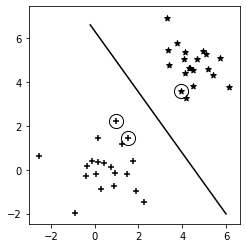

In [89]:
plt.axes().set_aspect("equal")
np.random.seed(0)
X0 = np.random.randn(20, 2)
X1 = np.random.randn(20, 2) + np.array([5, 5])
y = np.array([1] * 20 + [-1] * 20)

X = np.r_[X0, X1]
model = SVC()
model.fit(X, y)

plt.scatter(X0[:, 0], X0[:, 1], color = "k", marker="+")
plt.scatter(X1[:, 0], X1[:, 1], color = "k", marker="*")

def f(model, x):
    return (-model.w0_ - model.w_[0] * x) / model.w_[1]

x1 = -0.2
x2 = 6
plt.plot([x1, x2], [f(model, x1), f(model, x2)], color ="k")
plt.scatter(X[model.a_ != 0, 0], X[model.a_ != 0, 1],
            s=200, color=(0, 0, 0,0), edgecolor="k", marker="o")
plt.show()